# Setup Notebook

In [163]:
import IPython
import numpy as np
import pandas as pd
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import random

# Data Preparation

In [164]:
msg_df = pd.read_csv('spam.csv', encoding='cp1252')
msg_df = msg_df.drop(msg_df.columns[[2, 3, 4]], axis=1)

In [165]:
msg_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
# converting label to 0s and 1s 
for index, row in msg_df.iterrows():
        if row["v1"] == "ham":
            row["v1"] = 0
        else:
            row["v1"] = 1

In [167]:
msg_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [168]:
# split data into feature and labels
label = msg_df['v1']
feature = msg_df['v2']

In [169]:
# split the data into training and testing (30% split)
train_feature, test_feature, train_label, test_label = train_test_split(feature, label, test_size = 0.3)

# uses TF-IDF to identify the features we will be using
cv = TfidfVectorizer(min_df = 1, stop_words="english")
train_feat_cv = cv.fit_transform(train_feature).toarray()
train_label = train_label.astype('int')

test_feat_cv = cv.transform(test_feature).toarray()
test_label = test_label.astype('int')

# Create a Model Using Gaussian Naives Bayes Classifier

In [179]:
gnb = GaussianNB()

gnb.fit(train_feat_cv, train_label)
gnb_predictions = gnb.predict(test_feat_cv)
gnb_pred_proba = gnb.predict_proba(test_feat_cv)[:, 1]

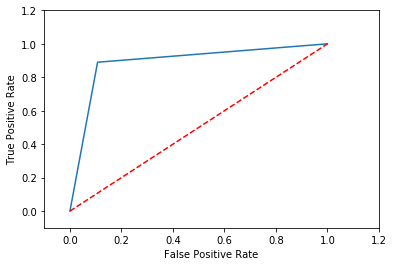

In [180]:
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(test_label, gnb_pred_proba)
plt.plot(gnb_fpr, gnb_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [157]:
print('AUC Score:' , roc_auc_score(test_label, gnb_pred_proba))

AUC Score: 0.8755304283168597


In [158]:
confusion_matrix(test_label, gnb_predictions)

array([[1279,  179],
       [  27,  187]])

# Create a Model Using Random Forrest Classifier

In [171]:
rf = RandomForestClassifier()

rf.fit(train_feat_cv, train_label)
rf_predictions = rf.predict(test_feat_cv)
rf_pred_proba = rf.predict_proba(test_feat_cv)[:, 1]

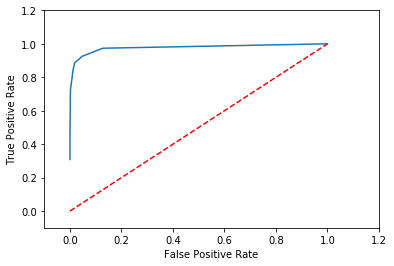

In [181]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(test_label, rf_pred_proba)
plt.plot(rf_fpr, rf_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [188]:
print('AUC Score:' , roc_auc_score(test_label, rf_pred_proba) * 100, "%")

AUC Score: 97.78485739981404 %


In [189]:
confusion_matrix(test_label, rf_predictions)

array([[1442,    3],
       [  62,  165]])

# Create a Model Using Logistic Regression

In [190]:
lr = LogisticRegression()

lr.fit(train_feat_cv, train_label)
lr_predictions = lr.predict(test_feat_cv)
lr_pred_proba = lr.predict_proba(test_feat_cv)[:, 1]

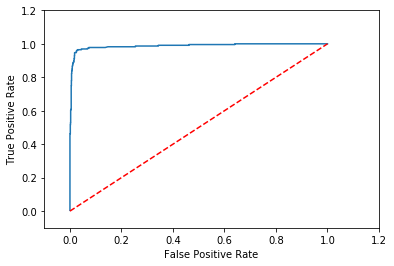

In [191]:
lr_fpr, lr_tpr, lr_thresholds = roc_curve(test_label, lr_pred_proba)
plt.plot(lr_fpr, lr_tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [193]:
print('AUC Score:' , roc_auc_score(test_label, lr_pred_proba) * 100, "%")

AUC Score: 98.75783119674404 %


In [194]:
confusion_matrix(test_label, lr_predictions)

array([[1438,    7],
       [  71,  156]])

# Performance Comparision

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, gnb_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

NameError: name 'gnb_predictions' is not defined

In [ ]:
plt.title('Gaussian Naives Bayes')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, rf_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
plt.title('Randam Forrest')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, lr_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [ ]:
plt.title('Logistic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()